# Part 2 Machine Learning
Eric Pahl

The line of questioning for this part of Eric Pahl’s comprehensive exam probes the depth of his understanding related to common assertions made about random decision forest.

## Problem 2.1: Implementation

Gini Impurity Index is a standard criterion used when constructing individual decision trees for a random forest implementation. Reusing the data set “ExampleData.csv” provided in Part 1, but now assuming that this data set represents a retrospective observational study that records which treatments a physician chooses based on the other variables.  For Part 2, interpret the variables as:

|Variable name|Data Type|Description|
|-------------|---------|-----------|
|Treatment<br>(output category)|Categorical|A: Branded drug <br>B: Generic Drug|
|Age|Integer|Age in years after birth|
|Sex|Categorical|M: Male,<br> F: Female|
|OverallHealthIdx|Integer|Score from a self-reported questionnaire|
|Time|Integer|Number of hours since emergency room admission|
|Censored <br>(poorly named variable)|Categorical|The identifier of the physician type:<br>0: Internal Medicine doctor, <br>1: Family Medicine doctor|

### a) Create a fork of the code associated with the article (https://github.com/joachimvalente/decision-tree-cart) for the modifications.  Store the results of part1 under your forked repositories branch named “part1_comps”.
Done. See https://github.com/ericpahl/decision-tree-cart/tree/part1_comps.

### b)	Modify the source code to generate a pictorial representation of the tree associated with applying the described algorithm to the data provided using a maximum tree depth of 1,000,000.
Carefully report the data manipulations or code modifications that are necessary to complete this task.  It is *NOT* acceptable to pre-process or modify the input data outside of this codebase.  The resulting changes needed to investigate the newly provided data set should not break the existing functionality of the program.

1. I read the Cart.py documentation and ran the main function to confirm it was working in its default configuration with prespecified datasets (iris, wifi, and breast).
1. I noticed that ExampleData.csv included incompatible datatypes like char and str when only numeric data were acceptable for the DecisionTreeClassifier.
1. I created two checks and conversions in the fit function within DecisionTreeClassifier code cart.py. 
    1. Convert the outcome varible to numeric 0 to n-1
    1. Convert binary str variables to 0 and 1
1. I ran the main function again to make sure that I did not break any existing functionality required for iris, breast, and wifi.
1. I fit the ExampleData successfully with max_depth 1,000,000 and used the debug function to print the tree. Unfortunately, this is an wieldly output and is difficult to see. I've created a video that helps explain what is going on, available here: https://www.loom.com/share/08580ccf1f2b4e62bab8fd03c096d422
 

In [1]:
#%pip3 install pandas
import numpy as np
import pandas as pd
import cart
import categorical_gini
import continuous_gini
import minimal_cart
import tree
import matplotlib.pyplot as plt

df = pd.read_csv('~/ExampleData.csv')
df.head()

,Treatment,Age,Sex,OverallHealthIdx,Time,Censored
0,A,95,M,56,39,1
1,A,85,M,66,37,1
2,A,73,F,67,39,1
3,A,62,M,39,23,0
4,A,62,M,92,29,0


In [2]:
df.describe(include='all')

,Treatment,Age,Sex,OverallHealthIdx,Time,Censored
count,200,200.000000,200,200.000000,200.000000,200.000000
unique,2,NaN,2,NaN,NaN,NaN
top,B,NaN,M,NaN,NaN,NaN
freq,100,NaN,105,NaN,NaN,NaN
mean,NaN,77.200000,NaN,67.220000,32.245000,0.360000
std,NaN,11.285692,NaN,15.213113,9.092212,0.481205
min,NaN,48.000000,NaN,35.000000,14.000000,0.000000
25%,NaN,70.000000,NaN,55.750000,25.000000,0.000000
50%,NaN,78.000000,NaN,67.000000,31.000000,0.000000
75%,NaN,85.000000,NaN,76.000000,39.000000,1.000000


In [3]:
# convert to numpy array
arr = df.to_numpy()

In [4]:
# predictors
X = arr[:,1:]

In [5]:
# outcome
y = arr[:,0]

In [6]:
# create the classifier per max_depth
clf = cart.DecisionTreeClassifier(max_depth=1000000)

In [7]:
# train the classifier with predictors and outcome
clf.fit(X, y)

In [17]:
%%capture cap --no-stderr
# print the tree
clf.debug(list(df.columns[1:]),
          list(list(np.unique(df['Treatment']))),
          False)

In [9]:
with open('tree.txt', 'w') as f:
    f.write(cap.stdout)

### c)	In your report, describe the Gini impurity Index, including its origins, intuitive meaning, and mathematical implementation.
There are two common splitting criteria for nodes when training decision-tree-based classifiers, Gini Index and Information Gain. The Gini Impurity Index (gini) is a simple measure of impurity in a set of observations. The gini was introduced in the early 20th century by Corrado Gini. 

Intuitively, gini is the chance of incorrectly classifying any given observations in the set. If there is a 50/50 split, then the gini is $0.5$. If there is a 75/25 split, then the gini is calculated by adding the incorrect probabilites, $0.75 * 0.25 + 0.25 * 0.75 = 0.375$ the impurity is reduced when the set becomes more homogeneous. The equation is $gini = \sum^C_{i=1} p(i) * (1-p(i))$ where $C$ is number of classes and $p(i)$ is the probability of picking an observation with class $i$.


### d)	Provide a simple function implementing the mathematical formulation of the Gini impurity Index that computes the Gini impurity index
In the Python programming language, in a new file named "categorical_gini.py" under the “part1_comps” branch.  Report the Gini impurity index for the categorical variables ["Sex," "Censored"] with respect to Treatment variable in the table above. The resulting code must be well documented and easy to understand by other non-expert programmers. Report any assumptions or limitations to apply this function.  

For the categorical_gini.py function, there are some assumptions and limitations. This function is only appropriate for binary categorical variables and categorical outcomes. The function assumes that there will be three inputs, an __X__ numpy array of observations (row) and variables (columns), __y__ vector of outcomes, and __varIdx__ the column index of __X__ of the variable in question to calculate the gini index. 




In [10]:
import categorical_gini as cat_gini

# index of variable to calculate
sexIdx = 1       # idx is 1 for Sex
censoredIdx = 4  # idx is 4 for Censored

print("Sex Gini: " + str(cat_gini.categorical_gini(X,y,sexIdx)))
print("Censored Gini: " + str(cat_gini.categorical_gini(X,y,censoredIdx)))

Sex Gini: 0.4999496234320136
Censored Gini: 0.48755711684992287


### e)	Provide a simple function implementing the mathematical formulation for identifying both the optimal Gini impurity index and the threshold for optimality of a continuous variable.
In the Python programming language, in a new file named "continuous_gini.py" under the “part1_comps” branch.  Report both the optimal Gini impurity index and the associated threshold for the categorical variables ["Age," "OverallHealthIdx," "Time"] with respect to Treatment in the table above. The resulting code must be well documented and easy to understand by other non-expert programmers. Report any assumptions or limitations to apply this function.

For the continuous_gini.py function, there are some assumptions and limitations. This function is only appropriate for continuous variables and categorical outcomes. The function assumes that there will be three inputs, an __X__ numpy array of observations (row) and variables (columns), __y__ vector of outcomes, and __varIdx__ the column index of __X__ of the variable in question to calculate the gini index. 


In [11]:
import continuous_gini as cont_gini
# index of variable to calculate
TimeIdx = 3       # idx is 3 for Time
AgeIdx = 0       # idx is 0 for Age
OverallHealthIdx = 2 # idx is 2 for overallhealthidx

print("Age (Gini,Threshold): " + str(cont_gini.continuous_gini(X,y,AgeIdx)))
print("OverallHealthIdx (Gini,Threshold): " + str(cont_gini.continuous_gini(X,y,OverallHealthIdx)))
print("Time (Gini,Threshold): " + str(cont_gini.continuous_gini(X,y,TimeIdx)))


Age (Gini,Threshold): (0.4892307692307692, 82.5)
OverallHealthIdx (Gini,Threshold): (0.4899218428630194, 90.5)
Time (Gini,Threshold): (0.4695495495495496, 46.5)


## Problem 2.2: Assumptions, Limitations, and Generalization
A model generated with the program in Part 2.1 can be used to predict outcomes given a set of input variables [“Age", "Sex”, “OverallHealthIdx”, “Time", "Censored”].  Assume that the provided 200 sample dataset ‘ExampleData.csv’ is the initial public release of data to be used for developing a predictive model to be submitted for evaluation on a large private dataset of 5 million samples.  Create a new branch called “part2_comps” for any changes made in this section.


### a)	For the model generated with a tree depth of 1,000,000, what is the accuracy of the model for the ‘ExampleData.csv’ dataset?


In [12]:
# create training and testing subsets
arr = df.to_numpy()
# shuffle rows
np.random.shuffle(arr)
# predictors
X = arr[:,1:]
# outcome
y = arr[:,0]
# train on first 150 observation
# :150

# test on the rest
# 151:

# create the classifier per max_depth
clf = cart.DecisionTreeClassifier(max_depth=1000000)

clf.fit(X[:151,:],y[:151])

# predict train values
y0 = clf.predict(X[:151,:])

# calculate training accuracy
print("Training Accuracy = "+str(np.mean(y0 == y[:151])*100) + "%")

# predict test values
y1 = clf.predict(X[151:,:])

# calculate testing accuracy
print("Testing Accuracy = "+str(np.mean(y1 == y[151:])*100) + "%")

Training Accuracy = 100.0%
Testing Accuracy = 53.06122448979592%


The training and testing accuracy for the model are different because the model is clearly overfit with a max depth of 1M and only 200 total observations. The test was a subset of the data held out during the training process and then used to test the model for applicability on data. We used a heldout set of 50 observations (25% of the example) to represent the 5 million samples available in the private dataset. Since these samples aren't used in the training we can assume that the classifier is likely to perform similar to the Test accuracy when applied to the private data.


### b)	Create models for various maximum depths and report (both graphically and in prose) on the effect of tree depth on the accuracy of the models with respect to the 200 samples provided in ‘ExampleData.csv’ data.



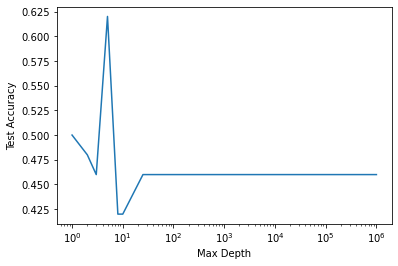

In [13]:
max_depths = [1,2,3,5,8,10,25,75,150,1000,10000,100000,1000000]

accu = []

for i in range(len(max_depths)):
    clftmp = cart.DecisionTreeClassifier(max_depth=max_depths[i])
    clftmp.fit(X[:150,:],y[:150])
    ytmp = clftmp.predict(X[150:,:])
    accu.append(np.mean(ytmp == y[150:]))
    
plt.plot(max_depths,accu)
plt.xlabel('Max Depth')
plt.xscale('log')
plt.ylabel('Test Accuracy')
plt.show()


Shown in the figure above, the test accuracy levels out as Max Depth gets larger and there is no benefit after 100 for this situation. Since the test set is only 25% of the ExampleData and only 50 samples, each time this experiment is executed the random "shuffle" of the variables changes the results for max depths less than 50. 

### c)	Using the algorithm completed for Part A, describe a process that will generate a better model for predicting the private evaluation data set.
In the describing the approach, include a details about the process, assumptions that are made about both the model and data characteristics, methods for evaluating criteria, and any other support justifying the assertion that this new model configuration would be applicable to the larger dataset, and any other support.

This model is significantly overtrained. With a max depth of 1000000, the decision tree is capable of uniquely classifying every single observation in the 200 observations. In order to build a model that translates better to a larger dataset or a different dataset we must separate the training, validation, and testing samples. This contrast what has been done in 2.2a because the training and testing data were the same, using a held out validation or testing dataset that is not used during training will promote better translation to new obserations, in this case, the larger private dataset.

Another option is to use 10-fold cross-validation where the average testing accuracy over 10 experiments with 10 folds (10%) of the ExampleData used for each respective experiment. This provides a way to estimate a better test accuracy considering an application on a much larger private dataset.

In [14]:
# 10 k-fold cross validation
k = 10

# fold size
fold = int(len(y)/k)

ksets = range(fold, len(y), fold)

test_acc = []

clftmp = cart.DecisionTreeClassifier(max_depth=1000000)

In [15]:
for i in ksets:
    # first fold
    if i == fold:
        clftmp.fit(X[:len(y)-i,:],y[:len(y)-i])
        ytmp = clftmp.predict(X[len(y)-i:,:])
        meantmp = np.mean(ytmp == y[len(y)-i:])
        test_acc.append(meantmp)
        print("first fold: "+str(meantmp))
    # last fold
    if i == len(y)-fold:
        clftmp.fit(X[i:,:],y[i:])
        ytmp = clftmp.predict(X[:i,:])
        meantmp = np.mean(ytmp == y[:i])
        test_acc.append(meantmp)
        print("last fold: "+str(meantmp))
    # middle fold
    else:
        # before and after folds must be concatenated
        midX = np.concatenate([X[:i-fold,:],X[i:,:]])
        midy = np.concatenate([y[:i-fold],y[i:]])
        clftmp.fit(midX,midy)
        ytmp = clftmp.predict(X[i-fold:i,:])
        meantmp = np.mean(ytmp == y[i-fold:i])
        test_acc.append(meantmp)
        print("middle fold: "+str(meantmp))
    
print(str(k)+"-fold cross validation accuracy is: "+str(np.mean(test_acc)))

first fold: 0.45
middle fold: 0.4
middle fold: 0.7
middle fold: 0.5
middle fold: 0.5
middle fold: 0.55
middle fold: 0.6
middle fold: 0.4
middle fold: 0.3
last fold: 0.5111111111111111
10-fold cross validation accuracy is: 0.49111111111111105


## Problem 2.3: Interpretation
Now consider the extension of decision trees into the random forest (RF) ensemble prediction method. 

Describe the original RF algorithm. 

  - The original RF algorithm was described by Leo Breiman in 2001. The RF algorithm combines the following concepts: Ensemble, bagging, and random split selection for decision trees. 
  - Use of the Strong Law of Large Numbers shows that they always converge so that overfitting is not a problem. The accuracy of a random forest depends on the strength of the individual tree classifiers and a measure of the dependence between them.
  - The random selection of features at each node to determine the split. An important question is how many features to select at each node. Two different forms of random features. The first uses random selection from the original inputs; the second uses random linear combinations of inputs. 
  - Bagging is used with random feature selection and these nicely complement each other. Bagging increases accuracy when random features are used and bagging can give out of bag estimates for generalizing error. Bagged classifiers have demonstrated empirically that out of bag estimates are as accurate as using a test set of the same size of the training set (basically, you need 1/2 as much data!).
  - For my qualifier exam (Spring 2017), I created two slides (9 and 10) that illustrate the RF algorithm available here: https://iowa-my.sharepoint.com/:p:/g/personal/epahl_uiowa_edu/Eb_o2xoTmmJAkLTh28rLDhwBUEI_-on8DKYX11Pfi2COMQ?e=JIKkKw.
  - 

What specific advantages and disadvantages does it have over decision trees, and in general over other competitor methods? 

  - 

Examine the generalization capabilities of the RF algorithm, both theoretically (in light of the bias-variance trade-off and the strength-diversity decomposition for ensembles) and in practice (using comparative literature review). 

On what sorts of datasets should the algorithm be expected to perform particularly well, relative to other state-of-the-art classification algorithms? 

In what ways (if any) can an RF model be interpreted, or its predictions be explained? 

Finally, how do decision trees (and therefore random forests) deal with missing feature values? 

In what way would you expect this mechanism to affect the performance of the algorithm?